In [16]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.layers import BatchNormalization



import warnings
warnings.filterwarnings('ignore')
import tensorflow_addons as tfa


In [2]:
import pathlib
data_dir = pathlib.Path('/Users/alfahwun/Documents/faces')


In [3]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

1036


In [4]:
img_height = 64
img_width = 64


In [21]:
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=8,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width))


Found 1035 files belonging to 2 classes.
Using 828 files for training.
Using 207 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names)

['angry', 'smiling']


In [23]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
val_ds = val_ds.map(lambda x,y: (x/255, y))

In [41]:
model = Sequential()
model.add(Conv2D(8, (3, 3), 1, activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


2023-03-07 10:58:03.161327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


104/104 [==============================] - ETA: 0s - loss: 0.7437 - accuracy: 0.5918

2023-03-07 10:58:10.776232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


104/104 [==============================] - 9s 52ms/step - loss: 0.7437 - accuracy: 0.5918 - val_loss: 0.6726 - val_accuracy: 0.5556
Epoch 2/10
104/104 [==============================] - 3s 26ms/step - loss: 0.4862 - accuracy: 0.7766 - val_loss: 0.6490 - val_accuracy: 0.5700
Epoch 3/10
104/104 [==============================] - 3s 25ms/step - loss: 0.3653 - accuracy: 0.8563 - val_loss: 0.5835 - val_accuracy: 0.7005
Epoch 4/10
104/104 [==============================] - 4s 36ms/step - loss: 0.2908 - accuracy: 0.8961 - val_loss: 0.5452 - val_accuracy: 0.6957
Epoch 5/10
104/104 [==============================] - 3s 26ms/step - loss: 0.2156 - accuracy: 0.9420 - val_loss: 0.5262 - val_accuracy: 0.7295
Epoch 6/10
104/104 [==============================] - 3s 25ms/step - loss: 0.1685 - accuracy: 0.9565 - val_loss: 0.5260 - val_accuracy: 0.7391
Epoch 7/10
104/104 [==============================] - 3s 27ms/step - loss: 0.1289 - accuracy: 0.9710 - val_loss: 0.5214 - val_accuracy: 0.7633
Epoch 8/10

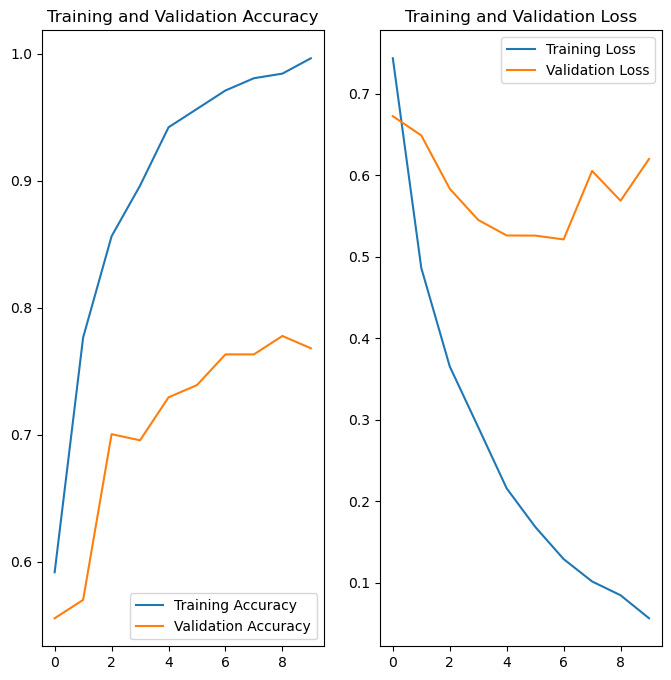

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [37]:
img = tf.keras.utils.load_img(
    "/Users/alfahwun/Downloads/testimage.png", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 61ms/step
This image most likely belongs to angry with a 50.00 percent confidence.


In [33]:
score

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7310586], dtype=float32)>